In [23]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import display
import scipy.stats as stats
import matplotlib.pyplot as plt

In [24]:
file_path = "/Users/markoshea/Desktop/Working Directories/Datasets/CARD.DTA"
data = pd.read_stata(file_path)
data.head() 

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
0,2,0,0,7,29,NaN,NaN,158413.0,1,0,...,1,548,0,15.0,NaN,1.0,0.0,16,6.306275,256
1,3,0,0,12,27,8.0,8.0,380166.0,1,0,...,1,481,0,35.0,93.0,1.0,1.0,9,6.175867,81
2,4,0,0,12,34,14.0,12.0,367470.0,1,0,...,1,721,0,42.0,103.0,1.0,1.0,16,6.580639,256
3,5,1,1,11,27,11.0,12.0,380166.0,1,0,...,1,250,0,25.0,88.0,1.0,1.0,10,5.521461,100
4,6,1,1,12,34,8.0,7.0,367470.0,1,0,...,1,729,0,34.0,108.0,1.0,0.0,16,6.591674,256


In [ ]:
data.describe() 

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
count,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,2320.000000,2657.000000,3.010000e+03,3010.000000,3010.000000,...,3010.000000,3010.000000,3010.000000,2963.000000,2061.000000,3003.000000,2997.000000,3010.000000,3010.000000,3010.000000
mean,2581.748837,0.440864,0.682060,13.263455,28.119601,10.003448,10.348137,3.211852e+05,0.789369,0.100664,...,0.649502,577.282392,0.092359,33.540668,102.449782,2.271395,0.674341,8.856146,6.261832,95.579070
std,1500.538849,0.496573,0.465753,2.676913,3.137004,3.720737,3.179671,1.706458e+05,0.407825,0.300934,...,0.477205,262.958302,0.289580,8.611619,15.423756,2.066823,0.468699,4.141672,0.443798,84.618314
min,2.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,7.560700e+04,0.000000,0.000000,...,0.000000,100.000000,0.000000,4.000000,50.000000,1.000000,0.000000,0.000000,4.605170,0.000000
25%,1275.500000,0.000000,0.000000,12.000000,25.000000,8.000000,8.000000,1.227980e+05,1.000000,0.000000,...,0.000000,394.250000,0.000000,28.000000,93.000000,1.000000,0.000000,6.000000,5.976985,36.000000
50%,2541.000000,0.000000,1.000000,13.000000,28.000000,10.000000,12.000000,3.652000e+05,1.000000,0.000000,...,1.000000,537.500000,0.000000,34.000000,103.000000,1.000000,1.000000,8.000000,6.286928,64.000000
75%,3858.750000,1.000000,1.000000,16.000000,31.000000,12.000000,12.000000,4.060240e+05,1.000000,0.000000,...,1.000000,708.750000,0.000000,40.000000,113.000000,4.000000,1.000000,11.000000,6.563503,121.000000
max,5225.000000,1.000000,1.000000,18.000000,34.000000,18.000000,18.000000,1.752340e+06,1.000000,1.000000,...,1.000000,2404.000000,1.000000,56.000000,149.000000,6.000000,1.000000,23.000000,7.784889,529.000000


In [26]:
data.columns

Index(['id', 'nearc2', 'nearc4', 'educ', 'age', 'fatheduc', 'motheduc',
       'weight', 'momdad14', 'sinmom14', 'step14', 'reg661', 'reg662',
       'reg663', 'reg664', 'reg665', 'reg666', 'reg667', 'reg668', 'reg669',
       'south66', 'black', 'smsa', 'south', 'smsa66', 'wage', 'enroll', 'KWW',
       'IQ', 'married', 'libcrd14', 'exper', 'lwage', 'expersq'],
      dtype='object')

In [27]:
#drop rows with missing values since regression fails with null values
M1_data_cleaned = data[['educ', 'KWW', 'lwage', 'age', 'exper']].dropna()

In [28]:
#implement regression model M1: lwage_i = beta_0 + beta_1 * educ_i + beta_3 * KWW_i + U_i
#handled missing by dropping rows
#decided to use Huber-White standard errors since I believe wage is likely heteroscedastic

M1_y = M1_data_cleaned['lwage']
M1_X = M1_data_cleaned[['educ', 'KWW']]

M1_X = sm.add_constant(M1_X)

M1 = sm.OLS(M1_y, M1_X)
M1_results = M1.fit(cov_type='HC0')

print(M1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     369.2
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          6.94e-144
Time:                        13:36:07   Log-Likelihood:                -1457.4
No. Observations:                2963   AIC:                             2921.
Df Residuals:                    2960   BIC:                             2939.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3512      0.039    137.797      0.0

In [29]:
#get table for M1 OLS estimates

##get output parameters
params = M1_results.params  
se = M1_results.bse         
t_vals = M1_results.tvalues  
p_vals = M1_results.pvalues  
CI = M1_results.conf_int() 

###create these to reduce clutter
low = 'CI Lower Bound'
up = 'CI Upper Bound'

CI.columns = [low, up]   

##organize as df
M1_param_df = pd.DataFrame({
    'Coefficient': ['beta_0_hat (Constant)', 'beta_1_hat (educ)', 'beta_3_hat (KWW)'],
    'Estimate': [params['const'], params['educ'], params['KWW']],
    'Standard Error': [se['const'], se['educ'], se['KWW']],
    't-value': [t_vals['const'], t_vals['educ'], t_vals['KWW']],
    'P>|t|': [p_vals['const'], p_vals['educ'], p_vals['KWW']],
    'CI Lower Bound': [CI.loc['const', low], CI.loc['educ', low], CI.loc['KWW', low]],
    'CI Upper Bound': [CI.loc['const', up], CI.loc['educ', up], CI.loc['KWW', up]]
})

M1_param_df = M1_param_df.round(3)
display(M1_param_df)

,Coefficient,Estimate,Standard Error,t-value,P>|t|,CI Lower Bound,CI Upper Bound
0,beta_0_hat (Constant),5.351,0.039,137.797,0.0,5.275,5.427
1,beta_1_hat (educ),0.021,0.003,6.819,0.0,0.015,0.027
2,beta_3_hat (KWW),0.019,0.001,19.977,0.0,0.017,0.021


In [30]:
#analyze correlation between M1 residuals and educ to evaluate whether E[U|educ] = 0
M1_residuals = M1_results.resid
corr, p_val = stats.pearsonr(M1_data_cleaned['educ'], M1_residuals)
print(f"Correlation: {corr}, p-value: {p_val}")

Correlation: 3.271688475692258e-15, p-value: 0.9999999999998554


In [31]:
#analyze covariance between M1 residuals and educ to evaluate whether E[U|educ] = 0
educ = M1_data_cleaned['educ']
cov = educ.cov(M1_residuals)
print(f"Covariance: {cov}")

Covariance: 3.4135797197387665e-15


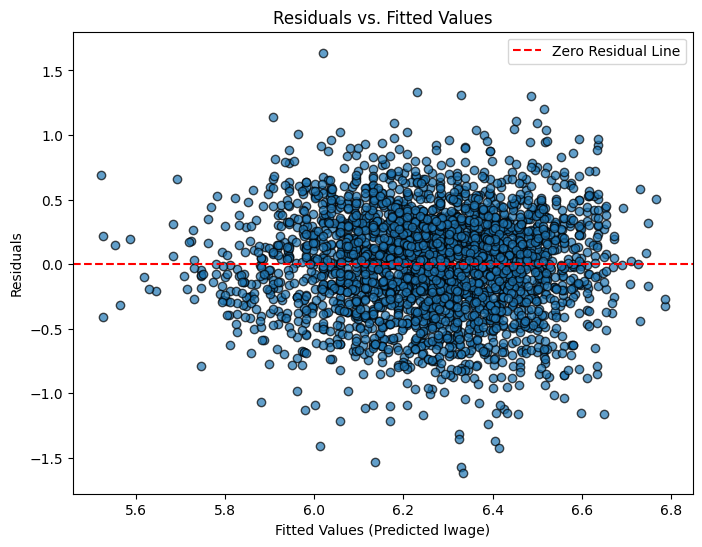

In [32]:
#implement plot of residuals vs fitted values
fitted_values = M1_results.fittedvalues  

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, M1_residuals, alpha=0.7, edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values (Predicted lwage)')
plt.ylabel('Residuals')
plt.legend()
plt.show()

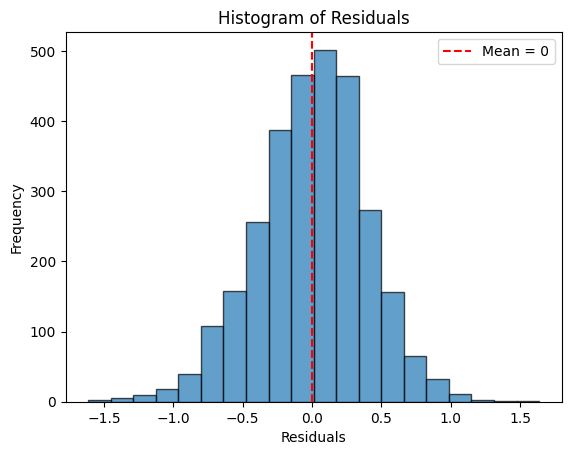

In [33]:
#implement plot to determine normality of residuals
plt.hist(M1_residuals, bins=20, edgecolor='k', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label='Mean = 0')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

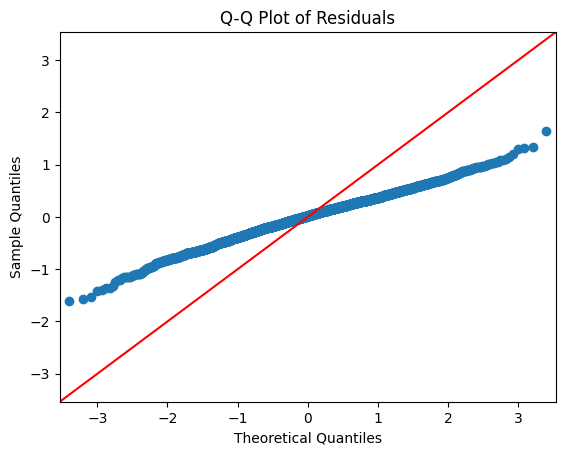

In [34]:
#implement QQ plot to determine normality of residuals
sm.qqplot(M1_residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

We observe a line where the slope is less steep than the theoretical standard normal line. This indicates the residuals have a smaller variance than expected under a normal distribution. 

Q1 (a) (i)

We see that each of these parameters is in a 95% confidence interval that does not contain zero, so each is significant. We note that the t-value for the constant is far greater for the constant coefficient than those for the educ and KWW coefficients. However, the educ and KWW coefficients still have high enough t-values that the corresponding p-values are approximately zero when we round to three decimal places. The specific interpretation of the estimate for beta0 (5.351) is that when KWW and educ are 0, the expected hourly wage is (e^5.351) / 100 = $2.11 / hr. According to Google, this is far below minimum wage at the time, but that might make sense given that people with KWW = 0 and 0 years of education is unlikely to comprise much of the labor force. The interpretation for the estimate of beta1 (0.021) is that an additional year of schooling predicts a 2.1% in hourly wage, since the dependent variable is the log of hourly wage. Similarly, the estimate for beta3 (0.019) implies that an increase of one unit on the intelligence metric KWW predicts a 1.9% increase in hourly wage. Since we are only regressing on two crude variables, and I personally find these numbers unconvincing, we likely have omitted variable bias here which further regressions that include key variables like age should address. Lastly, I'll note that I decided to use Huber-White standard errors since they are heteroscedasticity robust; I expect the variance of wage differs depending on education, as more education probably unlocks higher paying jobs in general. 


In [35]:
#create new variables for MD1 regression
#HS = I[12 ≤ educ < 16] and college = I[educ ≥ 16]
data['HS'] = ((data['educ'] >= 12) & (data['educ'] < 16)).astype(int)
data['College'] = (data['educ'] >= 16).astype(int) 
MD1_data_cleaned = data[['lwage', 'HS', 'College', 'KWW', 'age', 'exper']].dropna()

In [36]:
#implement regression model MD1: lwage_i = beta_0 + beta_1 * HS_i + beta_2 * College_i + beta_3 * KWW_i + U_i
#decided to use Huber-White standard errors since I believe wage is likely heteroscedastic
y = MD1_data_cleaned['lwage']
X = MD1_data_cleaned[['HS', 'College', 'KWW']]

X = sm.add_constant(X)

MD1 = sm.OLS(y, X)
MD1_results = MD1.fit(cov_type='HC0')

print(MD1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     255.5
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          1.89e-147
Time:                        13:36:08   Log-Likelihood:                -1451.3
No. Observations:                2963   AIC:                             2911.
Df Residuals:                    2959   BIC:                             2935.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5141      0.029    187.612      0.0

In [37]:
#get table for MD1 OLS estimates

##get output parameters
params = MD1_results.params  
se = MD1_results.bse         
t_vals = MD1_results.tvalues  
p_vals = MD1_results.pvalues
CI = MD1_results.conf_int()

###create these to reduce clutter
low = 'CI Lower Bound'
up = 'CI Upper Bound'

CI.columns = [low, up]   

##organize as df
MD1_param_df = pd.DataFrame({
    'Coefficient': ['beta_0_hat (Constant)', 'beta_1_hat (HS)', 'beta_2_hat (College)', 'beta_3_hat (KWW)'],
    'Estimate': [params['const'], params['HS'], params['College'], params['KWW']],
    'Standard Error': [se['const'], se['HS'], se['College'], se['KWW']],
    't-value': [t_vals['const'], t_vals['HS'], t_vals['College'], t_vals['KWW']],
    'P>|t|': [p_vals['const'], p_vals['HS'], p_vals['College'], p_vals['KWW']],
    'CI Lower Bound': [CI.loc['const', low], CI.loc['HS', low], CI.loc['College', low], CI.loc['KWW', low]],
    'CI Upper Bound': [CI.loc['const', up], CI.loc['HS', up], CI.loc['College', up], CI.loc['KWW', up]]
})

MD1_param_df = MD1_param_df.round(3)
display(MD1_param_df)

,Coefficient,Estimate,Standard Error,t-value,P>|t|,CI Lower Bound,CI Upper Bound
0,beta_0_hat (Constant),5.514,0.029,187.612,0.0,5.456,5.572
1,beta_1_hat (HS),0.125,0.021,5.891,0.0,0.083,0.167
2,beta_2_hat (College),0.195,0.025,7.681,0.0,0.145,0.245
3,beta_3_hat (KWW),0.019,0.001,20.200,0.0,0.017,0.020


Q1 (a) (ii)

As before, we see that each paramater estimate is contained in a 95% confidence interval that does not contain zero. Therefore, each parameter estimate is significant. We see that the standard errors for our parameter estimates are reasonably low. Again, I'll note that I decided to use Huber-White standard errors since they are heteroscedasticity robust; I expect the variance of wage differs depending on education, as more education probably unlocks higher paying jobs in general. Of these parameter estimates, the t-value for beta_1^hat is lowest, while that for beta_3^hat is 4x higher. This is likely because the low standard error for beta_3^hat (0.001) suggests a high degree of precision, despite that the coefficient value is the smallest of the four. The specific interpretation of the estimate for beta_0/Constant is that when KWW = 0 and someone has completed neither high school nor college (HS≤16), the expected hourly wage is $2.48 per hour. Note that according to Google, this is far below minimum wage at the time. The fact that this is only marginally higher than the estimate beta_0^hat = 5.351 given by M1 is somewhat surprising, since there are more people in the labor force who haven't completed high school than people who have 0 years of education. The interpretation for beta_1^hat/educ (0.021) is that an additional year of schooling predicts a 2.1% in wage, since the dependent variable is the log of wage. Similarly, the estimate beta3/KWW (0.019) predicts a 1.9% increase in wage. Since we are only regressing on two crude variables, and I personally find these numbers unconvincing, we likely have omitted variable bias here which further regressions that include key variables like age should address. 

Q1 (b)
It seems reasonable to assume that our sample is random and there is no multicollinearity. Further, there do not seem to be many extreme outliers in the dataset. It is more dubious but still somewhat conceivable that we can assume a linear population model. However, we clearly fail at the final assumption needed for unbiasedness of the estimators, which is that the expectation of the errors given the covariates is zero. With only a handful of covariates in both regressions, omitted variable bias is likely a problem here. It is already clear that factors such as age and location are missing but relevant. Thus, we can probably conclude $E[U | educ, KWW] ≠ 0.$ However, we can still consider a weaker definition of unbiasedness $E[U | educ]=0$, the implication of this being that U and educ are not correlated. As it turns out, the correlation between U and educ is about zero here (3.27E-15), but the p-value is 0.99, so this information is not highly convincing. Thus, we conclude it is possible but dubious that the coefficient $\hat{\beta}_1$ is unbiased.

Q1 (c)

In this dataset, the age ranges from 24-34, implying that KWW is measured for people only in that age group. In an ideal setting, we might measure intelligence earlier in life–before signficant schooling–to get the best estimate for natural intelligence such that Cov(educ, KWW) is minimized. It is possible that at higher ages more years of education might cause a higher score for KWW. 

In [38]:
#create interaction terms
data['educ_HS'] = data['educ'] * data['HS']
data['educ_College'] = data['educ'] * data['College']
interact_data_cleaned = data[['lwage', 'educ', 'HS', 'College', 'educ_HS', 'educ_College']].dropna()

In [39]:
X_extended = interact_data_cleaned[['educ', 'HS', 'College', 'educ_HS', 'educ_College']]
X_extended = sm.add_constant(X_extended)
y_extended = interact_data_cleaned['lwage']

extended_model = sm.OLS(y_extended, X_extended).fit(cov_type='HC0')
print(extended_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     73.05
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           2.22e-72
Time:                        13:36:08   Log-Likelihood:                -1649.2
No. Observations:                3010   AIC:                             3310.
Df Residuals:                    3004   BIC:                             3346.
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.5779      0.098     57.144   

In [40]:
#display table for regression results
params = extended_model.params
se = extended_model.bse
t_vals = extended_model.tvalues
p_vals = extended_model.pvalues
CI = extended_model.conf_int()

CI.columns = ['CI Lower Bound', 'CI Upper Bound']

results_table = pd.DataFrame({
    'Coefficient': params,
    'Std. Error': se,
    't-value': t_vals,
    'P>|t|': p_vals,
    'CI Lower': CI['CI Lower Bound'],
    'CI Upper': CI['CI Upper Bound']
}).round(3) 
display(results_table)

,Coefficient,Std. Error,t-value,P>|t|,CI Lower,CI Upper
const,5.578,0.098,57.144,0.000,5.387,5.769
educ,0.044,0.010,4.317,0.000,0.024,0.065
HS,0.548,0.162,3.373,0.001,0.230,0.867
College,-0.482,0.310,-1.554,0.120,-1.090,0.126
educ_HS,-0.034,0.014,-2.343,0.019,-0.062,-0.006
educ_College,0.035,0.020,1.730,0.084,-0.005,0.076


Q1 (d)

I prefer model MD1 over M1. Qualitatively, I believe that while linear approximation through OLS yields a reasonably predictive model for hourly wage, the variable educ is a proxy for the level of education completed. Someone who has completed a 4-year undergraduate program is likely to access higher paying jobs than someone who has completed a 4-year high school diploma. Someone who drops out of college after one year is likely to face a similar distribution of jobs as someone who never started college. For empirical evidence, I ran the regression $$lwage_i = \beta_0 + \beta_1 * educ_i + \beta_2 * HS_i + \beta_3 * College_i + \beta_4 * (educ_i * HS_i) + \beta_5 * (educ_i * College) + U_i.$$ The regression yielded a high condition number (665) and the coefficients for $College$ and $educ * College$ were not statistically significant (with $p = 0.12$ and $p=0.084$, respectively), so the results were inconclusive. However, the negative coefficient for $educ*HS$ suggests that an additional year of high school may reduce future expected wages. 

In [41]:
#create interaction term age*educ
M1_data_cleaned['educ_age'] = M1_data_cleaned['educ'] * M1_data_cleaned['age']

In [42]:
#M1 for men in {24, 28, 32}
#ran M1 regression again but included age and age*educ
M1_y_age = M1_data_cleaned['lwage']
M1_X_age = M1_data_cleaned[['age', 'educ', 'KWW', 'educ_age']]
M1_X_age = sm.add_constant(M1_X_age)

M1_age = sm.OLS(M1_y_age, M1_X_age).fit(cov_type='HC0')
print(M1_age.summary())


                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     223.7
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          5.80e-168
Time:                        13:36:08   Log-Likelihood:                -1395.5
No. Observations:                2963   AIC:                             2801.
Df Residuals:                    2958   BIC:                             2831.
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5978      0.081     57.074      0.0

In [43]:
#determine value for beta1 when age is 24, 28, and 32
M1age_beta1 = M1_age.params['educ']
M1age_beta3 = M1_age.params['educ_age']

M1_beta_24 = M1age_beta1 + 24 * M1age_beta3
M1_beta_28 = M1age_beta1 + 28 * M1age_beta3
M1_beta_32 = M1age_beta1 + 32 * M1age_beta3

print(f"The estimate for beta1 for men age 24 is {M1_beta_24:.3f}")
print(f"The estimate for beta1 for men age 28 is {M1_beta_28:.3f}")
print(f"The estimate for beta1 for men age 32 is {M1_beta_32:.3f}")

The estimate for beta1 for men age 24 is 0.039
The estimate for beta1 for men age 28 is 0.041
The estimate for beta1 for men age 32 is 0.042


In [44]:
MD1_data_cleaned

,lwage,HS,College,KWW,age,exper
0,6.306275,0,0,15.0,29,16
1,6.175867,1,0,35.0,27,9
2,6.580639,1,0,42.0,34,16
3,5.521461,0,0,25.0,27,10
4,6.591674,1,0,34.0,34,16
...,...,...,...,...,...,...
3005,5.814130,1,0,15.0,25,7
3006,6.175867,1,0,43.0,34,15
3007,6.214608,1,0,25.0,24,6
3008,6.569481,1,0,32.0,31,13


In [45]:
#create interaction terms for MD1 regression estimating beta1, beta2 given ages
MD1_data_cleaned['HS_age'] = MD1_data_cleaned['HS'] * MD1_data_cleaned['age']
MD1_data_cleaned['College_age'] = MD1_data_cleaned['College'] * MD1_data_cleaned['age']


In [46]:
#regression for MD1 for men in {24, 28, 32}
MD1_y_age = MD1_data_cleaned['lwage']
MD1_X_age = MD1_data_cleaned[['age', 'HS', 'College', 'HS_age', 'College_age', 'KWW']]
MD1_X_age = sm.add_constant(MD1_X_age)

MD1_age = sm.OLS(MD1_y_age, MD1_X_age).fit(cov_type='HC0')
print(MD1_age.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     160.2
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          1.18e-176
Time:                        13:36:09   Log-Likelihood:                -1374.8
No. Observations:                2963   AIC:                             2764.
Df Residuals:                    2956   BIC:                             2806.
Df Model:                           6                                         
Covariance Type:                  HC0                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.2827      0.161     32.901      

In [47]:
#determine value for beta1 and beta 2 when age is 24, 28, and 32
MD1age_beta1 = MD1_age.params['HS']
MD1age_beta2 = MD1_age.params['College']
MD1age_beta4 = MD1_age.params['HS_age']
MD1age_beta5 = MD1_age.params['College_age']

MD1_beta1_24 = MD1age_beta2 + 24 * MD1age_beta4
MD1_beta1_28 = MD1age_beta2 + 28 * MD1age_beta4
MD1_beta1_32 = MD1age_beta2 + 32 * MD1age_beta4

MD1_beta2_24 = MD1age_beta1 + 24 * MD1age_beta5
MD1_beta2_28 = MD1age_beta1 + 28 * MD1age_beta5
MD1_beta2_32 = MD1age_beta1 + 32 * MD1age_beta5

print(f"The estimate for beta1 for men age 24 is {MD1_beta1_24:.3f}")
print(f"The estimate for beta1 for men age 28 is {MD1_beta1_28:.3f}")
print(f"The estimate for beta1 for men age 32 is {MD1_beta1_32:.3f}")

print(f"The estimate for beta2 for men age 24 is {MD1_beta2_24:.3f}")
print(f"The estimate for beta2 for men age 28 is {MD1_beta2_28:.3f}")
print(f"The estimate for beta2 for men age 32 is {MD1_beta2_32:.3f}")

The estimate for beta1 for men age 24 is -0.553
The estimate for beta1 for men age 28 is -0.513
The estimate for beta1 for men age 32 is -0.472
The estimate for beta2 for men age 24 is 0.784
The estimate for beta2 for men age 28 is 0.934
The estimate for beta2 for men age 32 is 1.083


Q1 (e)
The estimates for beta_1 in regression M1 for men ages 24, 28, and 32 are 0.039, 0.041, and 0.042, respectively. We can see these are steadily increasing values, which makes sense given that the ages 24-32 are from significantly different snapshots in one's career and thus one can expect different earnings. The coefficients were statistically significant. The estimates for beta_1 and beta_2 in regression MD1 for men of those ages were respectively -0.553, -0.513, and -0.472, for beta1, and 0.784, 0.934, and 1.083 for beta2. The regression was not statistically significant, so it is a distinct possibility these these are biased estimates. However, we see a clear monotonic trend in each group of estimates. It is interesting that the estimates for beta1 are negative, as it would suggest that increasing age by another year would decrease expected wage. Thus, further evaluation is necessary. 

In [48]:
#create interaction term educ*exper for M1
M1_data_cleaned['educ_exper'] = M1_data_cleaned['educ'] * M1_data_cleaned['exper']

In [49]:
#M1 for exper in {4, 8, 12}
M1_y_exper = M1_data_cleaned['lwage']
M1_X_exper = M1_data_cleaned[['exper', 'educ', 'KWW', 'educ_exper']]
M1_X_exper = sm.add_constant(M1_X_exper)

M1_exper = sm.OLS(M1_y_exper, M1_X_exper).fit(cov_type='HC0')
print(M1_exper.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     219.9
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          1.94e-165
Time:                        13:36:09   Log-Likelihood:                -1401.0
No. Observations:                2963   AIC:                             2812.
Df Residuals:                    2958   BIC:                             2842.
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7311      0.084     56.178      0.0

In [50]:
#determine value for beta1 when experience is 4, 8, 12
M1exper_beta1 = M1_exper.params['educ']
M1exper_beta3 = M1_exper.params['educ_exper']

M1_beta_24 = M1exper_beta1 + 4 * M1exper_beta3
M1_beta_28 = M1exper_beta1 + 8 * M1exper_beta3
M1_beta_32 = M1exper_beta1 + 12 * M1exper_beta3

print(f"The estimate for beta1 for men age 24 is {M1_beta_24:.3f}")
print(f"The estimate for beta1 for men age 28 is {M1_beta_28:.3f}")
print(f"The estimate for beta1 for men age 32 is {M1_beta_32:.3f}")

The estimate for beta1 for men age 24 is 0.060
The estimate for beta1 for men age 28 is 0.061
The estimate for beta1 for men age 32 is 0.062


In [51]:
#create interaction terms HS*exper and College*exper for MD1
MD1_data_cleaned['HS_exper'] = MD1_data_cleaned['HS'] * MD1_data_cleaned['exper']
MD1_data_cleaned['College_exper'] = MD1_data_cleaned['College'] * MD1_data_cleaned['exper']

In [52]:
#regression for MD1 for exper in {4, 8, 12}
MD1_y_exper = MD1_data_cleaned['lwage']
MD1_X_exper = MD1_data_cleaned[['exper', 'HS', 'College', 'HS_exper', 'College_exper', 'KWW']]
MD1_X_exper = sm.add_constant(MD1_X_exper)

MD1_exper = sm.OLS(MD1_y_exper, MD1_X_exper).fit(cov_type='HC0')
print(MD1_exper.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     159.8
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          3.27e-176
Time:                        13:36:09   Log-Likelihood:                -1385.2
No. Observations:                2963   AIC:                             2784.
Df Residuals:                    2956   BIC:                             2826.
Df Model:                           6                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.5492      0.069     80.734

In [53]:
#determine value for beta1 and beta2 when exper is 4, 8, and 12
MD1exper_beta1 = MD1_exper.params['HS']
MD1exper_beta2 = MD1_exper.params['College']
MD1exper_beta4 = MD1_exper.params['HS_exper']
MD1exper_beta5 = MD1_exper.params['College_exper']

MD1_beta1_24 = MD1exper_beta2 + 4 * MD1exper_beta4
MD1_beta1_28 = MD1exper_beta2 + 8 * MD1exper_beta4
MD1_beta1_32 = MD1exper_beta2 + 12 * MD1exper_beta4

MD1_beta2_24 = MD1exper_beta1 + 4 * MD1exper_beta5
MD1_beta2_28 = MD1exper_beta1 + 8 * MD1exper_beta5
MD1_beta2_32 = MD1exper_beta1 + 12 * MD1exper_beta5

print(f"The estimate for beta1 for experience 4 is {MD1_beta1_24:.3f}")
print(f"The estimate for beta1 for experience 8 is {MD1_beta1_28:.3f}")
print(f"The estimate for beta1 for experience 12 is {MD1_beta1_32:.3f}")

print(f"The estimate for beta2 for experience 4 is {MD1_beta2_24:.3f}")
print(f"The estimate for beta2 for experience 8 is {MD1_beta2_28:.3f}")
print(f"The estimate for beta2 for experience 12 is {MD1_beta2_32:.3f}")

The estimate for beta1 for experience 4 is 0.102
The estimate for beta1 for experience 8 is 0.162
The estimate for beta1 for experience 12 is 0.221
The estimate for beta2 for experience 4 is 0.205
The estimate for beta2 for experience 8 is 0.373
The estimate for beta2 for experience 12 is 0.542


Q1 (f) 

The estimates for beta1 for regression M1 for men with 4, 8, and 12 years of experience were 0.060, 0.061, and 0.062, respectively, The respective estimates for beta1 and beta2 for 4, 8, and 12 years of experience were 0.102, 0.162, and 0.221, and then 0.205, 0.373, and 0.542. We see that both give increasing and positive estimates, which corresponds with expectation. As one increases their years of experience, they can expect a higher wage regardless of the type of degree completed.

Q1 (g)

Of these, it seems like there wee multicollinearity problems when I used MD1, so I prefer using M1 for estimating causal effects here.


Q1 (h)
It is clear that wage return differes by experience. Enough statistically significant estimators show clear differences and increasing trends as each of age and experience increases.

Q1 (i)

See earlier regression results for MD1